In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df_can = pd.read_excel('canada.xlsx')

In [4]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.columns = list(map(str, df_can.columns))
df_can.set_index('Country', inplace=True)
df_can['Total']=df_can.sum(axis=1)
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (43, 38)


In [5]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
df_continents = df_can.groupby('Continent',axis=0).sum()
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,111,85,110,90,102,77,117,194,322,550,...,5665,6701,5956,6383,7976,7884,7282,8016,8483,105258
Asia,5313,6832,3468,2027,1710,2262,2962,3919,4190,5886,...,51915,42295,34782,36735,35690,39679,36479,40829,41802,813228
Europe,770,798,732,447,321,370,429,602,576,622,...,4252,3336,3113,2686,2577,2210,1817,1974,1951,84601
Latin America and the Caribbean,2564,2554,2690,1782,1776,1621,1816,3279,2651,3201,...,9438,9579,8837,9113,8662,9197,6771,6480,6359,160191
Northern America,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2,20


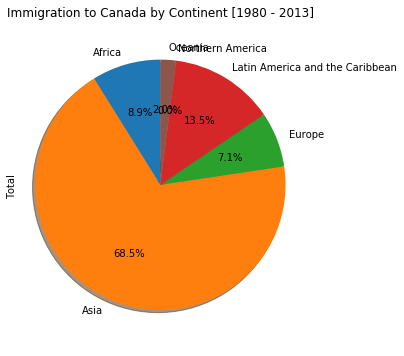

In [9]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

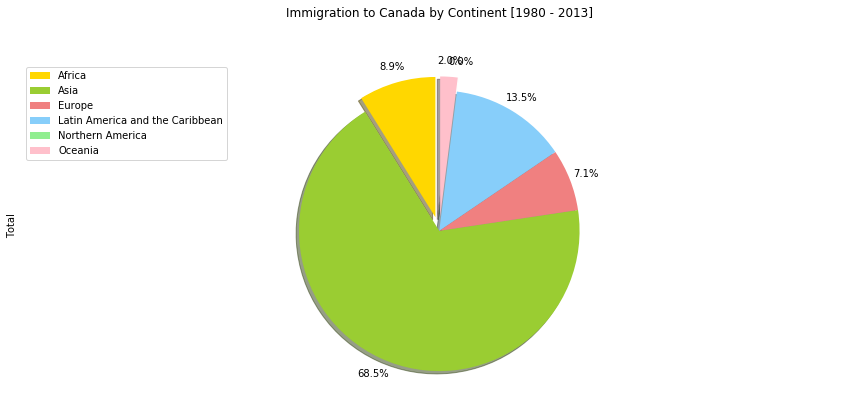

<Figure size 432x288 with 0 Axes>

In [13]:

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()
plt.savefig("Immigration_to_Canada_by_Continent", bbox_inches = "tight", dip = 1200)

In [19]:
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,295,184,106,76,62,61,39,70,45,2113
Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,...,24,32,15,32,38,27,37,51,25,981
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1153,847,620,540,467,459,278,263,282,19596
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310


In [21]:
df_Algeria = df_can.loc[['Algeria'],years].transpose()
df_Algeria.head()

Country,Algeria
1980,80
1981,67
1982,71
1983,69
1984,63


In [23]:
df_total=pd.DataFrame(df_can[years].sum(axis=0))
df_total.index = map(int, df_total.index)
df_total.reset_index(inplace = True)
df_total.columns = ['year', 'total']
df_total.head(5)

,year,total
0,1980,9460
1,1981,10909
2,1982,7484
3,1983,4663
4,1984,4226


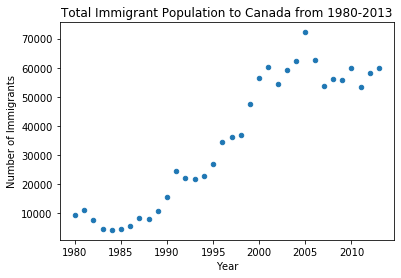

In [24]:
df_total.plot(
    kind='scatter',
    x='year',
    y='total'
)
plt.title('Total Immigrant Population to Canada from 1980-2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [25]:
x = df_total['year']
y=df_total['total']
fit = np.polyfit(x,y,deg=1)
fit

array([ 2.13309748e+03, -4.22381344e+06])

In [26]:
df_can.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

In [ ]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

In [ ]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top15 = df_can.head(15)

# transpose the dataframe
df_top15 = df_top15[years].transpose() 

df_top15.head()

In [ ]:
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')